In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import duckdb as dd
import polars as pl
import os
import glob
import shutil
import zipfile
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import librosa
from IPython.display import Audio
import pickle
from joblib import dump, load
from pathlib import Path

In [43]:
# Function to extract features from audio file
def extract_features(file_path, offset=0.0, duration=5.0):
    # Load audio file
    audio, sample_rate = librosa.load(path=file_path, offset=offset, duration=duration)
    # Extract features using Mel-Frequency Cepstral Coefficients (MFCC)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    # Flatten the features into a 1D array
    flattened_features = np.mean(mfccs.T, axis=0)
    return flattened_features

In [45]:
def audio_classification(file_path, offset=0.0, duration=5.0):
    extracted_features = extract_features(file_path, offset=offset, duration=duration).reshape(1, -1)
    y_predict = random_forest_model.predict_proba(extracted_features)
    
    return y_predict

In [4]:
random_forest_model = load('/kaggle/input/trained-audio-model-v-01/audio_classifier_model.joblib')

In [5]:
meta_data = pl.read_csv('../input/birdclef-2024/train_metadata.csv', low_memory=True)

In [6]:
bird_cols = list(meta_data['primary_label'].unique().sort())

In [47]:
test_soundscapes = '/kaggle/input/birdclef-2024/unlabeled_soundscapes/100350238.ogg'
# test_soundscapes = '/kaggle/input/birdclef-2024/test_soundscapes'

filenames_with_path = glob.glob(f"{test_soundscapes}/*.ogg")
filenames = [os.path.basename(filename) for filename in filenames_with_path]

print(len(filenames))

0


In [46]:
for i in range(0,241,5):
    print(float(i))

0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.0
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
100.0
105.0
110.0
115.0
120.0
125.0
130.0
135.0
140.0
145.0
150.0
155.0
160.0
165.0
170.0
175.0
180.0
185.0
190.0
195.0
200.0
205.0
210.0
215.0
220.0
225.0
230.0
235.0
240.0


In [40]:
audio, sample_rate = librosa.load(path=test_soundscapes, offset=0.0, duration=5.0)
audio_full, sample_rate_full = librosa.load(path=test_soundscapes)

In [41]:
Audio(audio, rate=sample_rate)

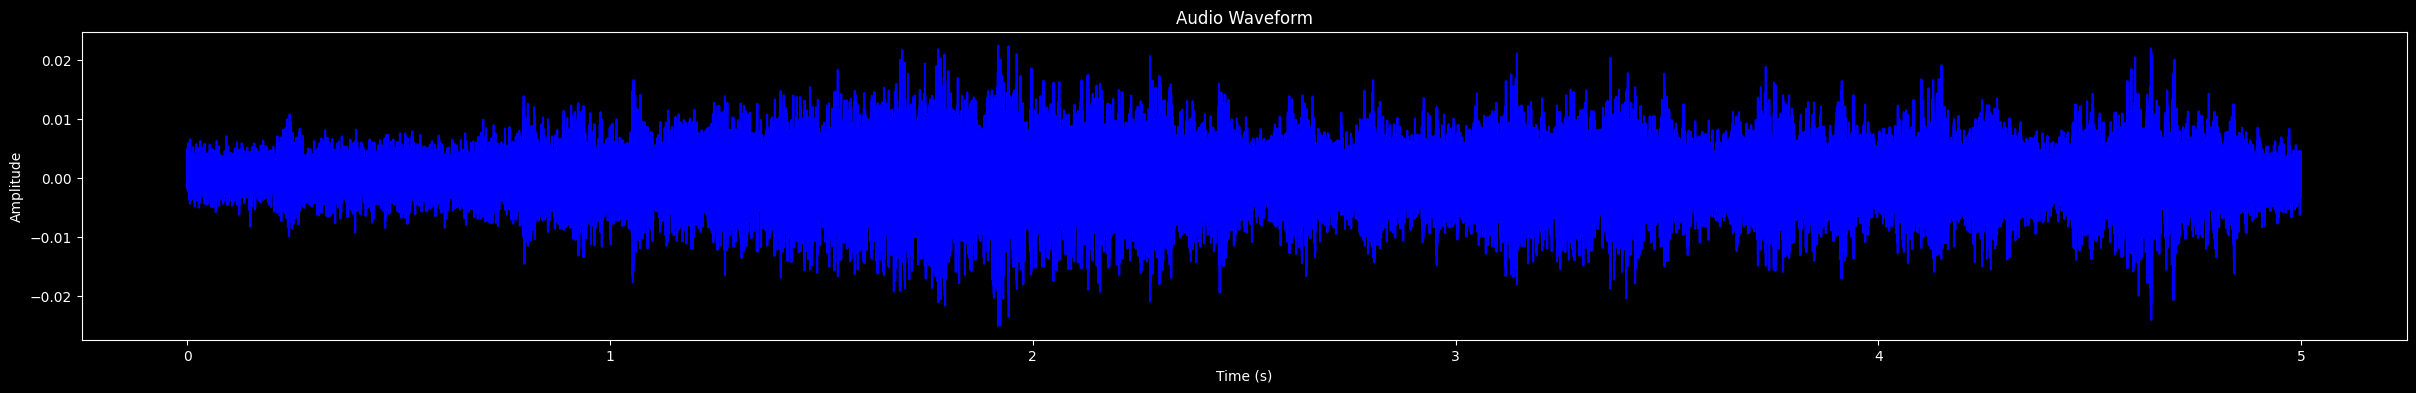

In [28]:
duration = len(audio) / sample_rate
time = np.arange(0, duration, 1/sample_rate)
plt.figure(figsize=(30, 4))
plt.plot(time, audio, color='blue')
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plot = plt.show()

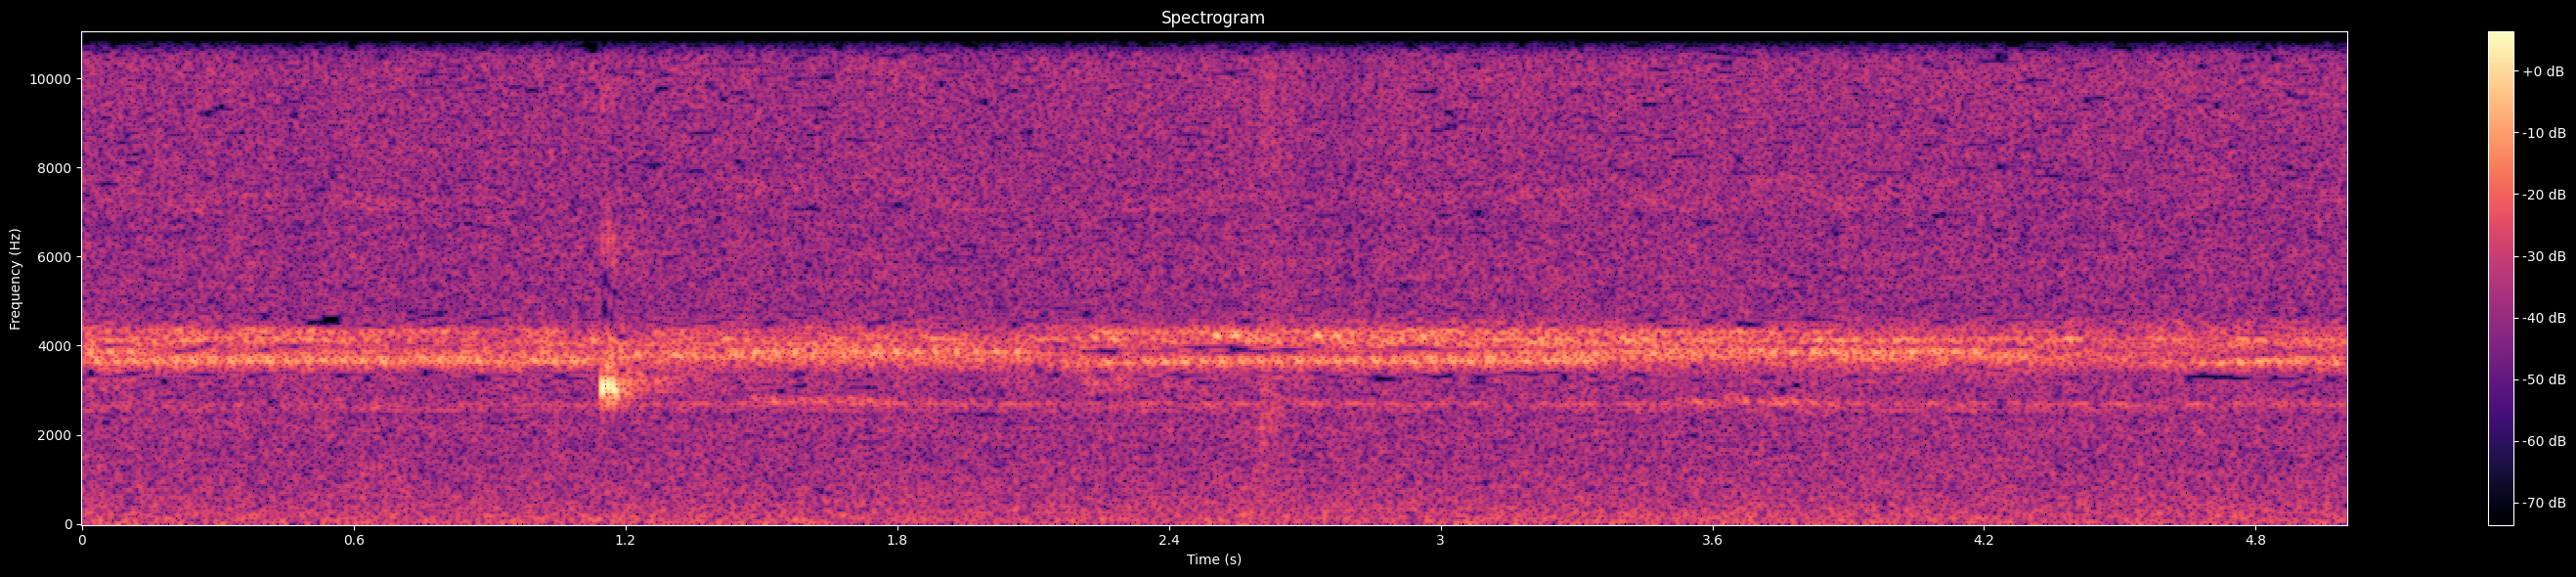

In [19]:
n_fft = 500  # Number of FFT points 2048
hop_length = 50  # Hop length for STFT 512
stft = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)
# Convert the magnitude spectrogram to decibels (log scale)
spectrogram = librosa.amplitude_to_db(np.abs(stft))
# Plot the spectrogram
plt.figure(figsize=(30, 6))
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plot = plt.show()

In [38]:
def audio_waveframe(file_path, offset=0.0, duration=5.0):
    # Load the audio file
    audio_data, sampling_rate = librosa.load(file_path, offset=offset, duration=duration)
    # Calculate the duration of the audio file
    duration = len(audio_data) / sampling_rate
    # Create a time array for plotting
    time = np.arange(0, duration, 1/sampling_rate)
    # Plot the waveform
    plt.figure(figsize=(30, 4))
    plt.plot(time, audio_data, color='blue')
    plt.title('Audio Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plot = plt.show()
    return plot

def spectrogram(file_path, offset=0.0, duration=5.0):
    # Compute the short-time Fourier transform (STFT)
    n_fft = 500  # Number of FFT points 2048
    hop_length = 50  # Hop length for STFT 512
    audio_data, sampling_rate = librosa.load(file_path, offset=offset, duration=duration)
    stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
    # Convert the magnitude spectrogram to decibels (log scale)
    spectrogram = librosa.amplitude_to_db(np.abs(stft))
    # Plot the spectrogram
    plt.figure(figsize=(30, 6))
    librosa.display.specshow(spectrogram, sr=sampling_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plot = plt.show()
    return plot

def audio_analysis(file_path, offset=0.0, duration=5.0):
    aw = audio_waveframe(file_path, offset, duration)
    spg = spectrogram(file_path, offset, duration)
    return aw, spg

In [64]:
submission_df = pd.DataFrame(columns=['row_id']+bird_cols)
print(submission_df.shape)

(0, 183)


In [59]:
df = pd.DataFrame(columns=['row_id']+bird_cols)
df

,row_id,asbfly,ashdro1,ashpri1,ashwoo2,asikoe2,asiope1,aspfly1,aspswi1,barfly1,...,whbwoo2,whcbar1,whiter2,whrmun,whtkin2,woosan,wynlau1,yebbab1,yebbul3,zitcis1


In [65]:
test_soundscapes = '/kaggle/input/birdclef-2024/unlabeled_soundscapes/100350238.ogg'
for j in range(0,241,5):
    predicted = audio_classification(test_soundscapes, offset=float(j), duration=5.0)
    filename_noext = test_soundscapes.replace('.ogg','')
    df['row_id'] = f'{filename_noext}_{j}'
    df[bird_cols] = predicted
    submission_df = pd.concat([submission_df,df]).reset_index(drop=True)

/tmp/ipykernel_33/3319379235.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  submission_df = pd.concat([submission_df,df]).reset_index(drop=True)
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


In [63]:
df.row_id.iloc[0]

'/kaggle/input/birdclef-2024/unlabeled_soundscapes/100350238_240'

In [48]:
test_soundscapes = '/kaggle/input/birdclef-2024/unlabeled_soundscapes/100350238.ogg'
for j in range(0,241,5):
    predicted = audio_classification(test_soundscapes, offset=float(j), duration=5.0)
    #num_rows = len(predicted)
    filename_noext = test_soundscapes.replace('.ogg','')
    row_ids = [f'{filename_noext}_{j}' for i in range(num_rows)]
    df = pd.DataFrame(columns=['row_id']+bird_cols)

    df['row_id'] = row_ids
    df[bird_cols] = predicted

    submission_df = pd.concat([submission_df,df]).reset_index(drop=True)

/tmp/ipykernel_33/2025012772.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  submission_df = pd.concat([submission_df,df]).reset_index(drop=True)
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


In [66]:
submission_df.row_id.iloc[10]

'/kaggle/input/birdclef-2024/unlabeled_soundscapes/100350238_50'

In [26]:
for i in range(len(filenames_with_path)):
    predicted = audio_classification(filenames_with_path[i])
    num_rows = len(predicted)
    filename_noext = filenames[i].replace('.ogg','')
    row_ids = [f'{filename_noext}_{(i+1)*5}' for i in range(num_rows)]
    df = pd.DataFrame(columns=['row_id']+bird_cols)

    df['row_id'] = row_ids
    df[bird_cols] = predicted

    submission_df = pd.concat([submission_df,df]).reset_index(drop=True)

'\nfor i, file_path in enumerate(file_paths):\n    print(i)\n    print(file_path)\n    print(filenames[i])\n    print("********")\n    if i == 10:\n        break'

In [27]:
for i in range(len(filenames_with_path)):
    predicted = audio_classification(filenames_with_path[i])
    num_rows = len(predicted)
    filename_noext = filenames[i].replace('.ogg','')
    row_ids = [f'{filename_noext}_{(i+1)*5}' for i in range(num_rows)]
    df = pd.DataFrame(columns=['row_id']+bird_cols)
    
    df['row_id'] = row_ids
    df[bird_cols] = predicted
    
    submission_df = pd.concat([submission_df,df]).reset_index(drop=True)
    """if i == 5:
        break"""

In [28]:
"""for i, file in enumerate(file_paths):
    # predicted = random_forest_model.predict_proba[i]
    predicted = audio_classification(file)
    num_rows = len(predicted)
    row_ids = [f'{filenames[i]}_{(i+1)*5}' for i in range(num_rows)]
    df = pd.DataFrame(columns=['row_id']+bird_cols)
    
    df['row_id'] = row_ids
    df[bird_cols] = predicted
    
    submission_df = pd.concat([submission_df,df]).reset_index(drop=True)
    if i == 5:
        break
    # print(submission_df.shape)"""

"for i, file in enumerate(file_paths):\n    # predicted = random_forest_model.predict_proba[i]\n    predicted = audio_classification(file)\n    num_rows = len(predicted)\n    row_ids = [f'{filenames[i]}_{(i+1)*5}' for i in range(num_rows)]\n    df = pd.DataFrame(columns=['row_id']+bird_cols)\n    \n    df['row_id'] = row_ids\n    df[bird_cols] = predicted\n    \n    submission_df = pd.concat([submission_df,df]).reset_index(drop=True)\n    if i == 5:\n        break\n    # print(submission_df.shape)"

In [29]:
submission_df.head(10)

,row_id,asbfly,ashdro1,ashpri1,ashwoo2,asikoe2,asiope1,aspfly1,aspswi1,barfly1,...,whbwoo2,whcbar1,whiter2,whrmun,whtkin2,woosan,wynlau1,yebbab1,yebbul3,zitcis1


In [67]:
submission_df.sum(axis=1, numeric_only=True)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
dtype: float64

In [ ]:
submission_df.to_csv('submission.csv', index=False)

In [ ]:
"""if submission_df.shape[0] == 0:
    submission_df = pl.read_csv('/kaggle/input/birdclef-2024/sample_submission.csv', low_memory=True)
    submission_df.write_csv('submission.csv')
else:
    submission_df.to_csv('submission.csv', index=False)"""